In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import colors
import random
import numpy as np


## Plot full cross-play matrix

['iql_2p_111', 'iql_2p_210', 'iql_2p_224', 'iql_2p_288', 'iql_2p_310', 'iql_2p_4', 'iql_2p_424', 'iql_2p_488', 'iql_2p_510', 'iql_2p_7', 'iql_aux_2p_800', 'iql_aux_2p_804', 'iql_aux_2p_810', 'iql_aux_2p_811', 'iql_aux_2p_8110', 'iql_aux_2p_8111', 'iql_aux_2p_8140', 'iql_aux_2p_8141', 'iql_aux_2p_840', 'iql_aux_2p_841', 'iql_op_2p_600', 'iql_op_2p_610', 'iql_op_2p_6110', 'iql_op_2p_612', 'iql_op_2p_6140', 'iql_op_2p_618', 'iql_op_2p_620', 'iql_op_2p_621', 'iql_op_2p_700', 'iql_op_2p_710', 'sad_2p_1', 'sad_2p_2000', 'sad_2p_2001', 'sad_2p_2006', 'sad_2p_2007', 'sad_2p_2018', 'sad_2p_2019', 'sad_2p_2024', 'sad_2p_2025', 'sad_2p_9', 'sad_aux_2p_1', 'sad_aux_2p_10', 'sad_aux_2p_20000', 'sad_aux_2p_20001', 'sad_aux_2p_20006', 'sad_aux_2p_20007', 'sad_aux_2p_20018', 'sad_aux_2p_20019', 'sad_aux_2p_20024', 'sad_aux_2p_20025', 'sad_aux_op_2p_1', 'sad_aux_op_2p_2', 'sad_aux_op_2p_25000', 'sad_aux_op_2p_25001', 'sad_aux_op_2p_25006', 'sad_aux_op_2p_25007', 'sad_aux_op_2p_25018', 'sad_aux_op_2p_25

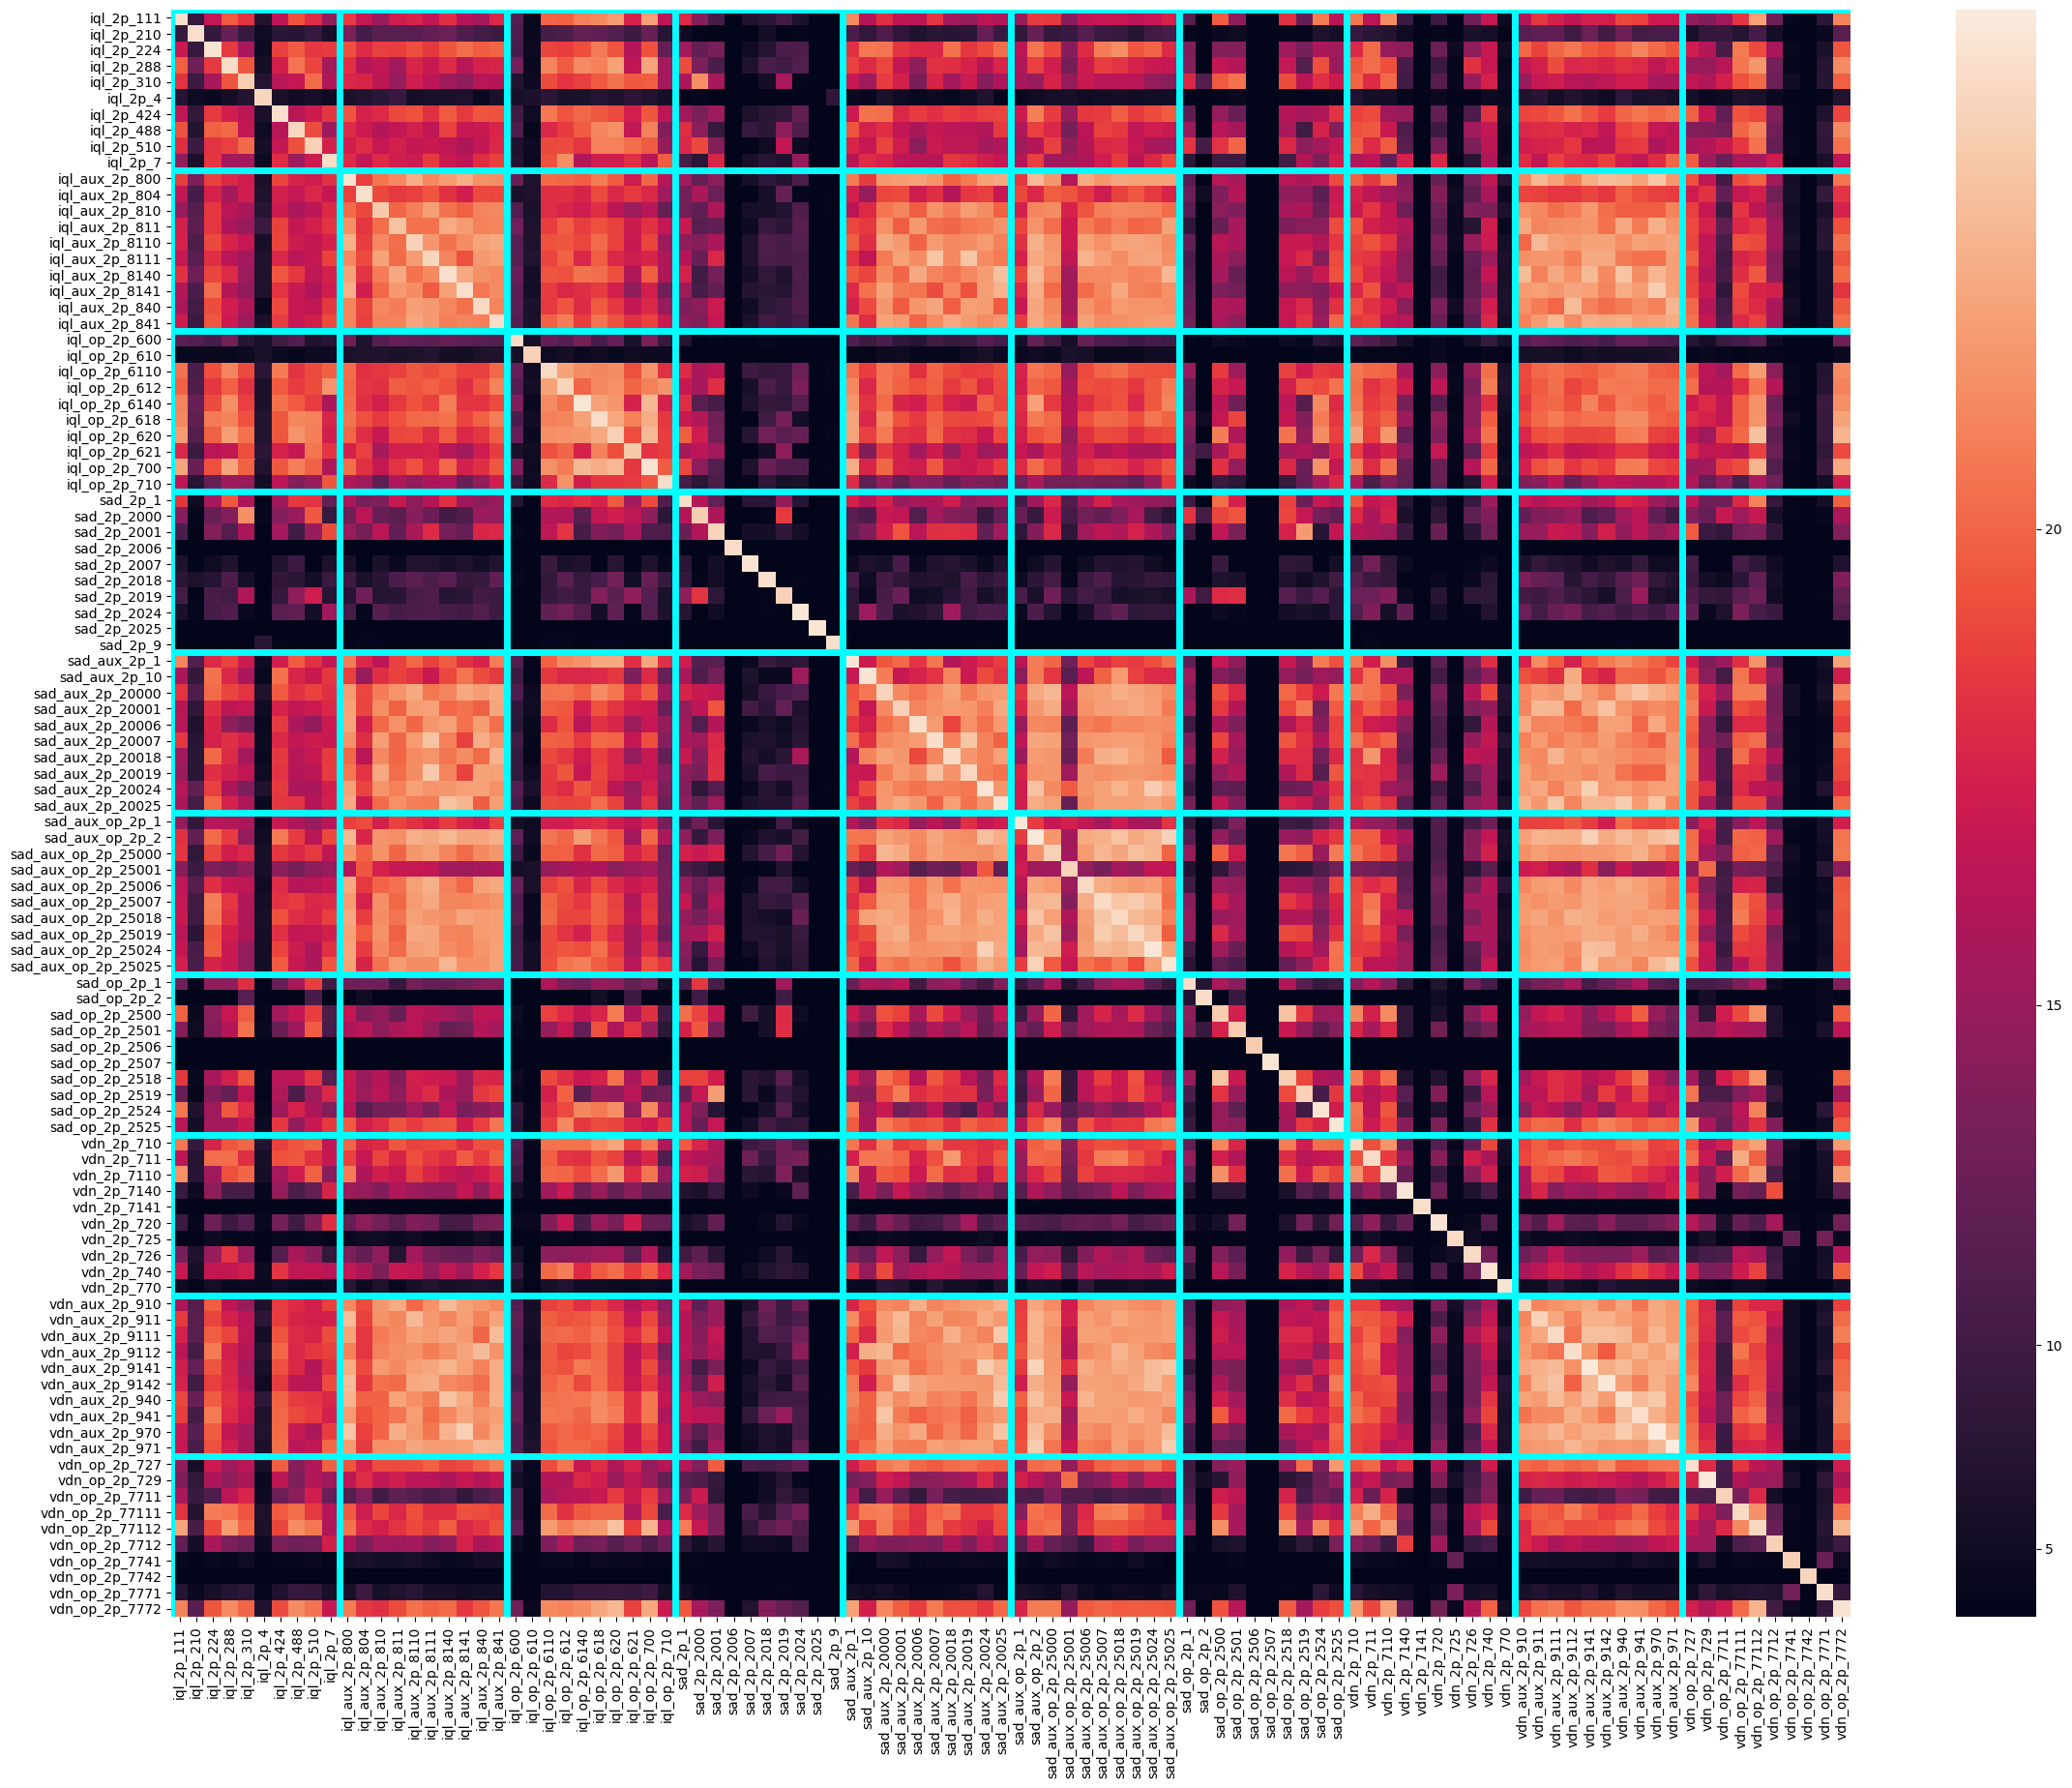

In [2]:
plt.rcParams['figure.figsize'] = [28, 22]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['font.size'] = 10


adhoc_matrix = pd.read_csv("scores_data_100_nrun5.csv", index_col=0)
adhoc_matrix.sort_index(axis=0, inplace=True)
adhoc_matrix.sort_index(axis=1, inplace=True)

columns = list(adhoc_matrix.columns)
print(columns)
names = []
for i in range(len(columns)):
    if len(columns[i].split("_")) == 3:
        ag_name = columns[i].split("_")[0]
    elif len(columns[i].split("_")) == 4:
        ag_name = columns[i].split("_")[0] + '_' + columns[i].split("_")[1]
    elif len(columns[i].split("_")) == 5:
        ag_name = columns[i].split("_")[0] + '_' + columns[i].split("_")[1] + '_' + columns[i].split("_")[2]
    names.append(ag_name+'_'+str(i%10))
    
# print(names)
# name_dict = dict((c,n) for c,n in zip(columns, names))
# adhoc_matrix.rename(name_dict, axis='index', inplace=True)
# adhoc_matrix.rename(name_dict, axis='columns', inplace=True)

ax = sns.heatmap(adhoc_matrix + 0.01, norm=colors.PowerNorm(gamma=2)) # cmap="YlGnBu_r" # 

for i in range(10):
    ax.hlines([10*i], *ax.get_xlim(), lw=5, color='cyan')
    ax.vlines([10*i], *ax.get_xlim(), lw=5, color='cyan')

plt.show()


## Report Self-Play, Intra-CP and Inter-CP scores (Table 2 of the paper)

In [3]:
all_final_eval_agents = ['iql_2p_510', 'iql_2p_7', 'iql_op_2p_612', 'iql_op_2p_6140',
'vdn_aux_2p_941', 'vdn_aux_2p_970', 
 'sad_op_2p_1', 'sad_op_2p_2501', 
 'sad_aux_op_2p_1', 'sad_aux_op_2p_25001',
'sad_aux_2p_1', 'sad_aux_2p_20001',
'sad_2p_1', 'sad_2p_2006',
'iql_aux_2p_800', 'iql_aux_2p_811', 'vdn_2p_726', 'vdn_2p_740', 'vdn_op_2p_727', 'vdn_op_2p_77111']

unseen_final_eval_agents = ['vdn_aux_2p_941', 'vdn_aux_2p_970', 'vdn_aux_2p_971',
 'sad_op_2p_1', 'sad_op_2p_2501', 'sad_op_2p_2518',
 'sad_aux_op_2p_1', 'sad_aux_op_2p_25001', 'sad_aux_op_2p_25006',
'sad_aux_2p_1', 'sad_aux_2p_20001','sad_aux_2p_20018', 'sad_aux_2p_20025',
'sad_2p_1', 'sad_2p_2006', 'sad_2p_2019',
'iql_aux_2p_800', 'iql_aux_2p_811', 'iql_aux_2p_8140','iql_aux_2p_841']

SAD_OP_AUX_agents = columns[50:60]
SAD_OP_agents = columns[60:70]
SAD_AUX_agents = columns[40:50]
SAD_agents = columns[30:40]
IQL_agents = columns[0:10]
IQL_AUX_agents = columns[10:20]

# SAD_OP_AUX_agents.remove('sad_aux_op_2p_1')
# SAD_OP_AUX_agents.remove('sad_aux_op_2p_25001')

# SAD_OP_agents.remove('sad_op_2p_2506')
# SAD_OP_agents.remove('sad_op_2p_2507')

# SAD_AUX_agents.remove('sad_aux_2p_10')
# SAD_AUX_agents.remove('sad_aux_2p_1')

# SAD_agents.remove('sad_2p_2006')
# SAD_agents.remove('sad_2p_2007')

In [4]:
print('######################################## OP+SAD+AUX performance ######################################')
WM_sum, all_ag_sum, unseen_ag_sum, SP_sum, WM_std, all_ag_std, unseen_ag_std = 0, 0, 0, 0, 0, 0, 0
SP_list, WM_list, all_ag_list, unseen_ag_list = [], [], [], []
bad_agent = 25
for agent in SAD_OP_AUX_agents:
    SAD_OP_AUX_agents_excludeSP = SAD_OP_AUX_agents[:]
    SAD_OP_AUX_agents_excludeSP.remove(agent)
    
            
    print('#########  OP+SAD+AUX: ', agent)
    # IQL_agents.remove('iql_2p_210')
    print('Self-Play score: {} '.format(adhoc_matrix[agent][agent]))
    print('INTRA-CP: {} +/- {} '.format(adhoc_matrix[agent][SAD_OP_AUX_agents_excludeSP].mean(), adhoc_matrix[agent][SAD_OP_AUX_agents_excludeSP].std() / len(SAD_OP_AUX_agents_excludeSP)))
    print('Our performance with all test agents before training: {} +/- {} '.format(adhoc_matrix[agent][all_final_eval_agents].mean(), adhoc_matrix[agent][all_final_eval_agents].std() / len(all_final_eval_agents)))
    print('Our performance with unseen test agents before training : {} +/- {} '.format( adhoc_matrix[agent][unseen_final_eval_agents].mean(), adhoc_matrix[agent][unseen_final_eval_agents].std()/ len(unseen_final_eval_agents)))


    if adhoc_matrix[agent][SAD_OP_AUX_agents_excludeSP].mean() < bad_agent:
        bad_agent = adhoc_matrix[agent][SAD_OP_AUX_agents_excludeSP].mean()
    SP_list.append(adhoc_matrix[agent][agent])
    WM_sum += adhoc_matrix[agent][SAD_OP_AUX_agents_excludeSP].mean()
    WM_list += list(adhoc_matrix[agent][SAD_OP_AUX_agents_excludeSP])
    all_ag_list += list(adhoc_matrix[agent][all_final_eval_agents])
    unseen_ag_list += list(adhoc_matrix[agent][unseen_final_eval_agents])
print('######### On average: ')
print('SAD+OP+AUX performance SP: {} +/- {}'.format(np.mean(SP_list), np.std(SP_list) / len(SP_list)))
print('bad agent: ', bad_agent)
print('SAD+OP+AUX  performance within method: {} +/- {}'.format(np.mean(WM_list), np.std(WM_list) / len(WM_list)))
print('SAD+OP+AUX  performance within method excluding bad agent: ', (WM_sum - bad_agent )/ (len(SAD_OP_agents) - 1))
print('SAD+OP+AUX  performance with all test agents: {} +/- {}'.format(np.mean(all_ag_list), np.std(all_ag_list) / len(all_ag_list)))
print('SAD+OP+AUX  performance with unseen test agents: {} +/- {}'.format(np.mean(unseen_ag_list), np.std(unseen_ag_list) / len(unseen_ag_list)))

print('######################################## OP+SAD performance ######################################')
WM_sum, all_ag_sum, unseen_ag_sum, SP_sum, WM_std, all_ag_std, unseen_ag_std = 0, 0, 0, 0, 0, 0, 0
SP_list, WM_list, all_ag_list, unseen_ag_list = [], [], [], []
bad_agent = 25
for agent in SAD_OP_agents:
    SAD_OP_agents_excludeSP = SAD_OP_agents[:]
    SAD_OP_agents_excludeSP.remove(agent)
    
    print('#########  OP+SAD: ', agent)
    # IQL_agents.remove('iql_2p_210')
    print('Self-Play score: {} '.format(adhoc_matrix[agent][agent]))
    print('INTRA-CP IQL : {} +/- {} '.format(adhoc_matrix[agent][SAD_OP_agents_excludeSP].mean(), adhoc_matrix[agent][SAD_OP_agents_excludeSP].std() / len(SAD_OP_agents_excludeSP)))
    print('Our performance with all test agents before training: {} +/- {} '.format(adhoc_matrix[agent][all_final_eval_agents].mean(), adhoc_matrix[agent][all_final_eval_agents].std() / len(all_final_eval_agents)))
    print('Our performance with unseen test agents before training : {} +/- {} '.format( adhoc_matrix[agent][unseen_final_eval_agents].mean(), adhoc_matrix[agent][unseen_final_eval_agents].std()/ len(unseen_final_eval_agents)))

    
    if adhoc_matrix[agent][SAD_OP_agents_excludeSP].mean() < bad_agent:
        bad_agent = adhoc_matrix[agent][SAD_OP_agents_excludeSP].mean()
    SP_list.append(adhoc_matrix[agent][agent])
    WM_sum += adhoc_matrix[agent][SAD_OP_agents_excludeSP].mean()
    WM_list += list(adhoc_matrix[agent][SAD_OP_agents_excludeSP])
    all_ag_list += list(adhoc_matrix[agent][all_final_eval_agents])
    unseen_ag_list += list(adhoc_matrix[agent][unseen_final_eval_agents])

print('######### On average: ')

print('SAD+OP performance SP: {} +/- {}'.format(np.mean(SP_list), np.std(SP_list) / len(SP_list)))
print('bad agent: ', bad_agent)
print('SAD+OP performance within method: {} +/- {}'.format(np.mean(WM_list), np.std(WM_list) / len(WM_list)))
print('SAD+OP performance within method excluding bad agent: ', (WM_sum - bad_agent )/ (len(SAD_OP_agents) - 1))
print('SAD+OP performance with all test agents: {} +/- {}'.format(np.mean(all_ag_list), np.std(all_ag_list) / len(all_ag_list)))
print('SAD+OP performance with unseen test agents: {} +/- {}'.format(np.mean(unseen_ag_list), np.std(unseen_ag_list) / len(unseen_ag_list)))

print('########################################  AUX+SAD performance ######################################')
WM_sum, all_ag_sum, unseen_ag_sum, SP_sum, WM_std, all_ag_std, unseen_ag_std = 0, 0, 0, 0, 0, 0, 0
SP_list, WM_list, all_ag_list, unseen_ag_list = [], [], [], []
bad_agent = 25
for agent in SAD_AUX_agents:
    SAD_AUX_agents_excludeSP = SAD_AUX_agents[:]
    SAD_AUX_agents_excludeSP.remove(agent)
    
    print('#########  AUX+SAD: ', agent)
    # IQL_agents.remove('iql_2p_210')
    print('Self-Play score: {} '.format(adhoc_matrix[agent][agent]))
    print('INTRA-CP IQL : {} +/- {} '.format(adhoc_matrix[agent][SAD_AUX_agents_excludeSP].mean(), adhoc_matrix[agent][SAD_AUX_agents_excludeSP].std() / len(SAD_AUX_agents_excludeSP)))
    print('Our performance with all test agents before training: {} +/- {} '.format(adhoc_matrix[agent][all_final_eval_agents].mean(), adhoc_matrix[agent][all_final_eval_agents].std() / len(all_final_eval_agents)))
    print('Our performance with unseen test agents before training : {} +/- {} '.format( adhoc_matrix[agent][unseen_final_eval_agents].mean(), adhoc_matrix[agent][unseen_final_eval_agents].std()/ len(unseen_final_eval_agents)))

    if adhoc_matrix[agent][SAD_OP_AUX_agents_excludeSP].mean() < bad_agent:
        bad_agent = adhoc_matrix[agent][SAD_OP_AUX_agents_excludeSP].mean()
    SP_list.append(adhoc_matrix[agent][agent])
    WM_sum += adhoc_matrix[agent][SAD_AUX_agents_excludeSP].mean()
    WM_list += list(adhoc_matrix[agent][SAD_AUX_agents_excludeSP])
    all_ag_list += list(adhoc_matrix[agent][all_final_eval_agents])
    unseen_ag_list += list(adhoc_matrix[agent][unseen_final_eval_agents])
print('#########  AUX+SAD On average: ', agent)
print('AUX+SAD performance SP: {} +/- {}'.format(np.mean(SP_list), np.std(SP_list) / len(SP_list)))
print('bad agent: ', bad_agent)
print('AUX+SAD performance within method: {} +/- {}'.format(np.mean(WM_list), np.std(WM_list) / len(WM_list)))
print('AUX+SAD performance within method excluding bad agent: ', (WM_sum - bad_agent )/ (len(SAD_OP_agents) - 1))
print('AUX+SAD performance with all test agents: {} +/- {}'.format(np.mean(all_ag_list), np.std(all_ag_list) / len(all_ag_list)))
print('AUX+SAD performance with unseen test agents: {} +/- {}'.format(np.mean(unseen_ag_list), np.std(unseen_ag_list) / len(unseen_ag_list)))


print('########################################  SAD performance  ######################################')
WM_sum, all_ag_sum, unseen_ag_sum, SP_sum, WM_std, all_ag_std, unseen_ag_std = 0, 0, 0, 0, 0, 0, 0
SP_list, WM_list, all_ag_list, unseen_ag_list = [], [], [], []
bad_agent = 25
for agent in SAD_agents:
    SAD_agents_excludeSP = SAD_agents[:]
    SAD_agents_excludeSP.remove(agent)

    print('#########  SAD: ', agent)
    # IQL_agents.remove('iql_2p_210')
    print('Self-Play score: {} '.format(adhoc_matrix[agent][agent]))
    print('INTRA-CP IQL : {} +/- {} '.format(adhoc_matrix[agent][SAD_agents_excludeSP].mean(), adhoc_matrix[agent][SAD_agents_excludeSP].std() / len(SAD_agents_excludeSP)))
    print('Our performance with all test agents before training: {} +/- {} '.format(adhoc_matrix[agent][all_final_eval_agents].mean(), adhoc_matrix[agent][all_final_eval_agents].std() / len(all_final_eval_agents)))
    print('Our performance with unseen test agents before training : {} +/- {} '.format( adhoc_matrix[agent][unseen_final_eval_agents].mean(), adhoc_matrix[agent][unseen_final_eval_agents].std()/ len(unseen_final_eval_agents)))


    if adhoc_matrix[agent][SAD_agents_excludeSP].mean() < bad_agent:
        bad_agent = adhoc_matrix[agent][SAD_agents_excludeSP].mean()
    SP_list.append(adhoc_matrix[agent][agent])
    WM_sum += adhoc_matrix[agent][SAD_agents_excludeSP].mean()
    WM_list += list(adhoc_matrix[agent][SAD_agents_excludeSP])
    all_ag_list += list(adhoc_matrix[agent][all_final_eval_agents])
    unseen_ag_list += list(adhoc_matrix[agent][unseen_final_eval_agents])

print('#########  SAD On average: ')

print('SAD performance SP: {} +/- {}'.format(np.mean(SP_list), np.std(SP_list) / len(SP_list)))
print('bad agent: ', bad_agent)
print('SAD performance within method: {} +/- {}'.format(np.mean(WM_list), np.std(WM_list) / len(WM_list)))
print('SAD performance within method excluding bad agent: ', (WM_sum - bad_agent )/ (len(SAD_OP_agents) - 1))
print('SAD performance with all test agents: {} +/- {}'.format(np.mean(all_ag_list), np.std(all_ag_list) / len(all_ag_list)))
print('SAD performance with unseen test agents: {} +/- {}'.format(np.mean(unseen_ag_list), np.std(unseen_ag_list) / len(unseen_ag_list)))


print('######################################## IQL performance #######################################')

IQL_agents_excludeSP = IQL_agents[:]
IQL_agents_excludeSP.remove("iql_2p_210")
print('Self-Play score: {} '.format(adhoc_matrix["iql_2p_210"]["iql_2p_210"]))

print('INTRA-CP IQL : {} +/- {} '.format(adhoc_matrix['iql_2p_210'][IQL_agents_excludeSP].mean(), adhoc_matrix['iql_2p_210'][IQL_agents_excludeSP].std() / len(IQL_agents_excludeSP)))
print('Our performance with all test agents before training: {} +/- {} '.format(adhoc_matrix['iql_2p_210'][all_final_eval_agents].mean(), adhoc_matrix['iql_2p_210'][all_final_eval_agents].std() / len(all_final_eval_agents)))
print('Our performance with unseen test agents before training : {} +/- {} '.format( adhoc_matrix['iql_2p_210'][unseen_final_eval_agents].mean(), adhoc_matrix['iql_2p_210'][unseen_final_eval_agents].std()/ len(unseen_final_eval_agents)))



print('######################################## IQL+AUX performance #######################################')
IQL_AUX_agents_excludeSP = IQL_AUX_agents[:]
IQL_AUX_agents_excludeSP.remove("iql_aux_2p_841")

print('Self-Play score: {} '.format(adhoc_matrix["iql_aux_2p_841"]["iql_aux_2p_841"]))

print('INTRA-CP IQL : {} +/- {} '.format( adhoc_matrix['iql_aux_2p_841'][IQL_AUX_agents_excludeSP].mean(), adhoc_matrix['iql_aux_2p_841'][IQL_AUX_agents_excludeSP].std() / len(IQL_AUX_agents_excludeSP)))
print('Our performance with all test agents before training : {} +/- {} '.format(adhoc_matrix['iql_aux_2p_841'][all_final_eval_agents].mean(), adhoc_matrix['iql_aux_2p_841'][all_final_eval_agents].std() / len(all_final_eval_agents)))
print('Our performance with unseen test agents before training : {} +/- {} '.format(adhoc_matrix['iql_aux_2p_841'][unseen_final_eval_agents].mean(),adhoc_matrix['iql_aux_2p_841'][all_final_eval_agents].std()/ len(unseen_final_eval_agents)))

######################################## OP+SAD+AUX performance ######################################
#########  OP+SAD+AUX:  sad_aux_op_2p_1
Self-Play score: 24.1432 
INTRA-CP: 16.888733333333334 +/- 0.139122947668245 
Our performance with all test agents before training: 15.23681 +/- 0.24882297464314496 
Our performance with unseen test agents before training : 15.610650000000001 +/- 0.26133084543855817 
#########  OP+SAD+AUX:  sad_aux_op_2p_2
Self-Play score: 24.2358 
INTRA-CP: 21.23791111111111 +/- 0.2897840669288361 
Our performance with all test agents before training: 17.71762 +/- 0.26157480990702203 
Our performance with unseen test agents before training : 18.09358 +/- 0.30989575311537804 
#########  OP+SAD+AUX:  sad_aux_op_2p_25000
Self-Play score: 23.405 
INTRA-CP: 20.55313333333333 +/- 0.2997130953197955 
Our performance with all test agents before training: 17.78526 +/- 0.2360203187305793 
Our performance with unseen test agents before training : 18.6232 +/- 0.25169597857

Our performance with all test agents before training: 4.904249999999999 +/- 0.1785178622899651 
Our performance with unseen test agents before training : 4.64019 +/- 0.15981199311016087 
#########  SAD:  sad_2p_2018
Self-Play score: 23.8742 
INTRA-CP IQL : 2.543111111111111 +/- 0.29660408102033076 
Our performance with all test agents before training: 7.00633 +/- 0.15825530829294393 
Our performance with unseen test agents before training : 6.803519999999999 +/- 0.16027395725017704 
#########  SAD:  sad_2p_2019
Self-Play score: 23.4486 
INTRA-CP IQL : 4.922088888888889 +/- 0.8080925896643945 
Our performance with all test agents before training: 10.167250000000001 +/- 0.21282049070012526 
Our performance with unseen test agents before training : 10.28722 +/- 0.25648957335738354 
#########  SAD:  sad_2p_2024
Self-Play score: 24.1248 
INTRA-CP IQL : 1.993288888888889 +/- 0.3238400693359989 
Our performance with all test agents before training: 7.819190000000001 +/- 0.22987481253190603 
O

## Visualize network of agents
### Each edge mean two agents are able to coordinate and get a CP score higher than 21

node : degree 
iql_2p_111 : (0, 8) 
iql_op_2p_618 : (25, 16) 
iql_op_2p_620 : (26, 16) 
iql_op_2p_700 : (28, 12) 
sad_aux_2p_1 : (40, 13) 
vdn_2p_7110 : (72, 9) 
vdn_op_2p_77112 : (94, 18) 
iql_2p_210 : (1, 2) 
iql_2p_224 : (2, 3) 
sad_aux_op_2p_25018 : (56, 36) 
iql_2p_288 : (3, 7) 
iql_op_2p_6140 : (24, 12) 
vdn_op_2p_7772 : (99, 16) 
iql_2p_310 : (4, 3) 
sad_2p_2000 : (31, 3) 
iql_2p_4 : (5, 2) 
iql_2p_424 : (6, 2) 
iql_2p_488 : (7, 6) 
iql_2p_510 : (8, 2) 
iql_2p_7 : (9, 3) 
iql_op_2p_612 : (23, 9) 
iql_aux_2p_800 : (10, 32) 
iql_aux_2p_811 : (13, 19) 
iql_aux_2p_8110 : (14, 31) 
iql_aux_2p_8111 : (15, 28) 
iql_aux_2p_8140 : (16, 28) 
iql_aux_2p_8141 : (17, 24) 
iql_aux_2p_840 : (18, 25) 
iql_aux_2p_841 : (19, 34) 
sad_aux_2p_20000 : (42, 33) 
sad_aux_2p_20001 : (43, 26) 
sad_aux_2p_20006 : (44, 20) 
sad_aux_2p_20007 : (45, 25) 
sad_aux_2p_20024 : (48, 29) 
sad_aux_2p_20025 : (49, 28) 
sad_aux_op_2p_2 : (51, 37) 
sad_aux_op_2p_25000 : (52, 30) 
sad_aux_op_2p_25006 : (54, 29) 
sad_a

/home/hnekoeiq/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


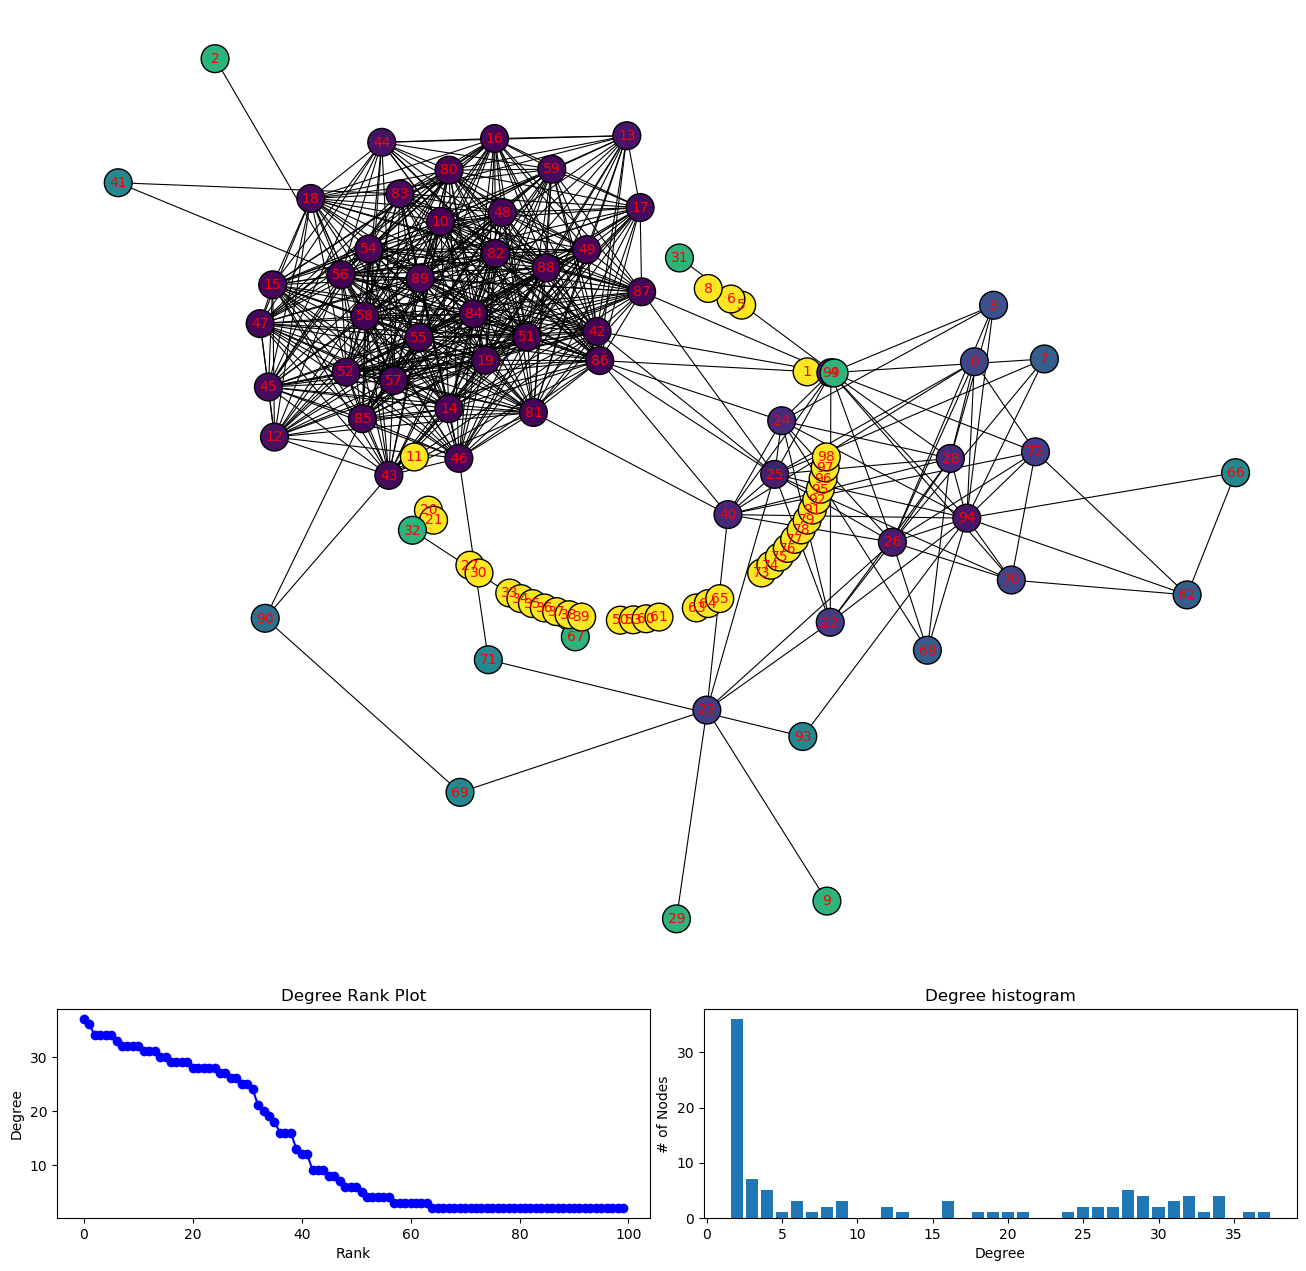

In [5]:
import numpy as np
import networkx as nx

def show_graph_with_labels(adjacency_matrix, nodes):
    rows, cols = np.where(adjacency_matrix == 1)

    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    num_edges = 0
    print('{} : {} '.format('node', 'degree'))
    for node, deg in zip(gr.nodes, gr.degree):
        print('{} : {} '.format(nodes[node], deg))
        num_edges += deg[1]
    print('num_edges: ', num_edges)
    options = {
    "font_size": 10,
    "font_color": "red",
    "node_size": 400,
    "node_color": [1/gr_d[1] for gr_d in gr.degree], 
    "edgecolors": 'black',
    "edge_cmap": plt.cm.Blues,
    "linewidths": 1,
    "width": 0.8,
    }
    
    fig = plt.figure("Degree of a random graph", figsize=(16, 16))
    axgrid = fig.add_gridspec(5, 4)
    ax0 = fig.add_subplot(axgrid[0:4, :])

    nx.draw(gr, pos=nx.kamada_kawai_layout(gr), with_labels=True, **options)

    ax1 = fig.add_subplot(axgrid[4:, :2])
    degree_sequence = sorted([d for n, d in gr.degree()], reverse=True)
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")
    
    ax2 = fig.add_subplot(axgrid[4:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")
    plt.show()


adhoc_adj_matrix = adhoc_matrix.copy()
adhoc_adj_matrix[adhoc_matrix<=21] = 0
adhoc_adj_matrix[adhoc_matrix>21] = 1
# adhoc_adj_matrix[adhoc_adj_matrix!=0] = 1

# np.fill_diagonal(adhoc_adj_matrix.values, 0)

nodes = dict()
for i, n in enumerate(adhoc_matrix.columns):
    nodes[i] = n
    
show_graph_with_labels(adhoc_adj_matrix, nodes)

# G = nx.DiGraph(adhoc_adj_matrix.values, index_col=0)

# nx.draw(G)
plt.show()

## Plot a showcase of how Continual-training can result in OOD generalization.

In [6]:
font_size = 16
font_size_legend = 18
font_size_title = 8

plt.rc('font', size=font_size)  # controls default text sizes
plt.rc('axes', titlesize=font_size_title)  # fontsize of the axes title
plt.rc('axes', labelsize=font_size)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_size)  # fontsize of the tick labels
plt.rc('ytick', labelsize=font_size)  # fontsize of the tick labels
plt.rc('legend', fontsize=font_size_legend)  # legend fontsize
plt.rc('figure', titlesize=font_size_title)  # fontsize of the figure title
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['figure.dpi'] = 80 

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}

2.8787351788106914
3.371997103597016
1.326052193123969
2.9567548195708677
1.5869787046110253


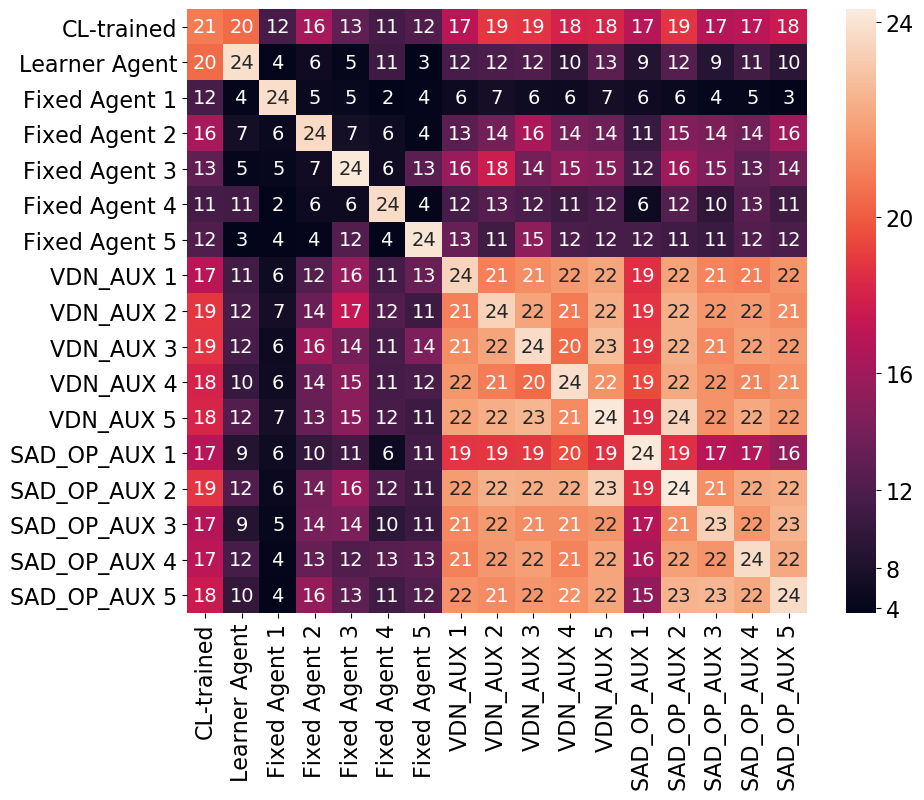

In [7]:
columns = list(adhoc_matrix.columns)
generalization_agents = ['vdn_aux_2p_910', 'vdn_aux_2p_911', 'vdn_aux_2p_9111', 'vdn_aux_2p_9112', 'vdn_aux_2p_9141',
                    'sad_aux_op_2p_1', 'sad_aux_op_2p_2', 'sad_aux_op_2p_25000', 'sad_aux_op_2p_25006',
                   'sad_aux_op_2p_25007']
names = []  
rename = True
agent_type = 'Hard'

if agent_type == 'Hard':
    fixed_agents = ['iql_2p_210', 
                    'vdn_op_2p_7771',
                         'vdn_2p_726',
                         'vdn_2p_7140',
                         'iql_op_2p_600',
                         'vdn_2p_720']

    columns_to_pick = fixed_agents + generalization_agents
elif agent_type == 'Easy':
    fixed_agents = ['iql_2p_210',
                'iql_2p_310',
                 'vdn_2p_720',
                'vdn_2p_7140',
                'iql_op_2p_710',
                 'vdn_op_2p_729']
    columns_to_pick = fixed_agents + generalization_agents


# f_idx = []
# for f in fixed_agents:
#     f_idx.append(columns.index(f))
# fixed_matrix = adhoc_matrix[fixed_agents].iloc[f_idx].to_numpy()
# mask = np.ones(fixed_matrix.shape, dtype=bool)
# np.fill_diagonal(mask, 0)
# print(np.std(fixed_matrix[mask]))

fixed_agents.remove(fixed_agents[0])
for f_i, f_ag in enumerate(fixed_agents):
    fixed_agents_ = fixed_agents.copy()
    fixed_agents_.remove(f_ag)
    f_idx = []
    for f in fixed_agents_:
        f_idx.append(columns.index(f))
    fixed_matrix = adhoc_matrix[fixed_agents_].iloc[f_idx].to_numpy()
    mask = np.ones(fixed_matrix.shape, dtype=bool)
    np.fill_diagonal(mask, 0)
    print(np.std(fixed_matrix[mask]))

if rename == True:
    for i in range(len(columns_to_pick)):
        if i == 0:
            names.append('Learner Agent')
        elif i <= 5:
            names.append( 'Fixed Agent ' + str(i))
        elif i <= 10:
            names.append('VDN_AUX ' + str(i - 5))
        elif i <= 15:
            names.append('SAD_OP_AUX '+str(i - 10))
c_idx = []
for c in columns_to_pick:
    c_idx.append(columns.index(c))
    
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100 
df = adhoc_matrix[columns_to_pick].iloc[c_idx]
if rename == True:
    name_dict = dict((c,n) for c,n in zip(columns_to_pick, names))
    df.rename(name_dict, axis='index', inplace=True)
    df.rename(name_dict, axis='columns', inplace=True)
mask = np.zeros_like(df, dtype=np.bool)
# mask[np.triu_indices_from(mask, k=1)] = True

# ax = sns.heatmap(df, annot=True,  fmt=".0f", norm=colors.PowerNorm(gamma=2), annot_kws={"fontsize":14}) # 
# plt.xticks(rotation=90) 
# for i in range(3):
#     ax.hlines([5*i+1], *ax.get_xlim(), lw=5, color='cyan')
#     ax.vlines([5*i+1], *ax.get_xlim(), lw=5, color='cyan')

ER_SGD_scores = [20.47, 11.63, 16.24, 13.02, 11.46, 12.14, 17.04, 18.91, 18.87, 18.13, 18.26, 16.90, 18.85, 16.85, 
                  17.10, 17.65]
concat = pd.DataFrame([ER_SGD_scores], columns = names).append(df)
concat.insert(loc=0, column='CL-trained', value=[20.91] + ER_SGD_scores)
concat.index = ['CL-trained'] + names
# c_idx = []
# for c in columns_to_pick:
#     c_idx.append(columns.index(c))
    
# plt.rcParams['figure.figsize'] = [10, 8]
# plt.rcParams['figure.dpi'] = 100 
# if rename == True:
#     name_dict = dict((c,n) for c,n in zip(columns_to_pick, names))
#     concat.rename(name_dict, axis='index', inplace=True)
#     concat.rename(name_dict, axis='columns', inplace=True)

ax = sns.heatmap(concat, annot=True, fmt=".0f", norm=colors.PowerNorm(gamma=2), annot_kws={"fontsize":14}) # 
plt.xticks(rotation=90) 

plt.savefig('mot_matrix.png')
plt.show()